**Riddler Classic**

You are trying to catch a grasshopper on a balance beam that is 1 meter long. Every time you try to catch it, it jumps to a random point along the interval between 20 centimeters left of its current position and 20 centimeters right of its current position.

If the grasshopper is within 20 centimeters of one of the edges, it will not jump off the edge. For example, if it is 10 centimeters from the left edge of the beam, then it will randomly jump to anywhere within 30 centimeters of that edge with equal probability (meaning it will be twice as likely to jump right as it is to jump left).

After many, many failed attempts to catch the grasshopper, where is it most likely to be on the beam? Where is it least likely? And what is the ratio between these respective probabilities?

Simulation:

Initialize the grasshopper randomly on the balance beam.

Then update the position using the rules. 

keep an record of positions.

After running the simulation many times, plot the histogram of the positions.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def max_val(A, B):
    if A>=B:
        return A
    else:
         return B
def min_val(A, B):
    if A>=B:
        return B
    else:
         return A

def update(x_curr):
    """Takes the current position and updates it using the rules of the game"""
    #check if the current position is within 20 cm of either edge:
    return np.random.uniform(max_val(x_curr-0.2, -0.5), min_val(x_curr+0.2, 0.5))


In [ ]:
#Testing the update function:
# "if it is 10 centimeters from the left edge of the beam, then it will randomly jump to anywhere within 30 centimeters of that edge with equal probability 
# (meaning it will be twice as likely to jump right as it is to jump left)."
pos = []
for i in range(100000):
    pos.append(update(0.4))

c_plus = sum([1 if i>0.4 else 0 for i in pos])
c_minus = len(pos)-c_plus

c_minus/c_plus

2.00815209216978

In [ ]:
steps= 1000000
x_curr = np.random.uniform(-0.5,0.5)
positions = [x_curr]
while(steps>0):
    x_curr = update(x_curr)
    positions.append(x_curr)
    steps-=1


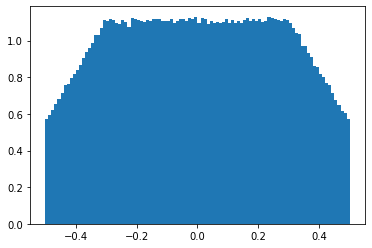

In [ ]:
fig, ax = plt.subplots()
ax.hist(positions, bins = 100, density=True)
plt.show()

In [ ]:
np.histogram(positions, bins=100, density=True)

(array([0.57169988, 0.59599988, 0.62209987, 0.65279987, 0.68199986,
        0.71169986, 0.75569985, 0.76339985, 0.79589984, 0.81659983,
        0.83819983, 0.86929982, 0.90249982, 0.94039981, 0.95879981,
        0.9860998 , 1.02799979, 1.03189979, 1.06789978, 1.11189978,
        1.10589978, 1.11649977, 1.11449977, 1.09779978, 1.08939978,
        1.11069978, 1.09909978, 1.07659978, 1.12379977, 1.12049977,
        1.11419977, 1.10479978, 1.10339978, 1.11269978, 1.10569978,
        1.11629977, 1.11839977, 1.11649977, 1.10529978, 1.10459978,
        1.10599978, 1.11689977, 1.09599978, 1.10719978, 1.11899977,
        1.11749977, 1.10959978, 1.12129977, 1.11649977, 1.13049977,
        1.09489978, 1.12259977, 1.12069977, 1.09199978, 1.10599978,
        1.09509978, 1.10169978, 1.09529978, 1.10249978, 1.11639977,
        1.09779978, 1.11299978, 1.09849978, 1.10979978, 1.09769978,
        1.11259978, 1.12609977, 1.10439978, 1.11609977, 1.10719978,
        1.11549977, 1.10259978, 1.10439978, 1.12

In [ ]:
ma = np.max(np.histogram(positions, bins=100, density=True)[0])
mi = np.min(np.histogram(positions, bins=100, density=True)[0])
ma/mi


1.9774357180339228

In [ ]:
#maximum occurs at position
ma_pos= np.histogram(positions, bins=100, density=True)[1][np.argmax(np.histogram(positions, bins=100, density=True)[0])]
ma_pos

-0.009999696609816033

In [ ]:
#minimum occurs at position
mi_pos= np.histogram(positions, bins=100, density=True)[1][np.argmin(np.histogram(positions, bins=100, density=True)[0])]
mi_pos

-0.4999993056407399

In [ ]:
trials = 1000
steps = 5000
positions = np.zeros((trials,steps))

for trial in range(trials):
    x_curr = np.random.uniform(-0.5,0.5)
    positions[trial][0] = x_curr
    for step in range(steps):
        x_curr = update(x_curr)
        positions[trial][step] = x_curr

        
    

In [ ]:
ma_pos = []
mi_pos = []
for trial in range(trials):
    ma_pos.append(np.histogram(positions[trial], bins=100, density=True)[1][np.argmax(np.histogram(positions[trial], bins=100, density=True)[0])])
    mi_pos.append(np.histogram(positions[trial], bins=100, density=True)[1][np.argmin(np.histogram(positions[trial], bins=100, density=True)[0])])


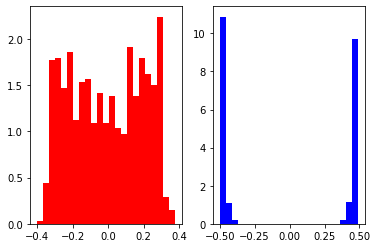

In [ ]:
fig, ax = plt.subplots(1,2)
ax[0].hist(ma_pos, bins = 23, density=True, color='r')
ax[1].hist(mi_pos, bins = 23, density=True, color = 'b')
plt.show()

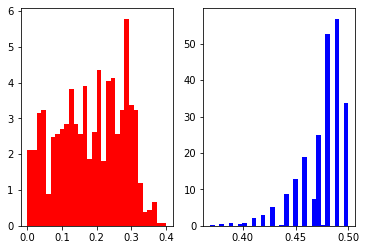

In [ ]:
fig, ax = plt.subplots(1,2)
ax[0].hist([abs(pos) for pos in ma_pos], bins = 30, density=True, color='r')
ax[1].hist([abs(pos) for pos in mi_pos], bins = 30, density=True, color = 'b')
plt.show()